<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/grokking-machine-learning/04-optimizing-training-process/regularization_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Regularization Fundamentals

In this notebook, we see an example of polynomial regression with regularization in Turi Create.


##Setup

In [ ]:
!pip -q install turicreate

In [13]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

import turicreate as tc

random.seed(0)

##Polynomial function


First, let's define a polynomial function.

$$ y = x^2 + x + 15$$

In [1]:
coefs = [15, 1, -1]

In [2]:
def polynomial(coefs, x):
  n = len(coefs)
  return sum([coefs[i] * x ** i for i in range(n)])

In [4]:
def draw_polynomial(coefs):
  n = len(coefs)
  x = np.linspace(-5, 5, 1000)
  plt.ylim(-20, 20)
  plt.plot(x , sum([coefs[i] * x ** i for i in range(n)]), linestyle="-", color="k")

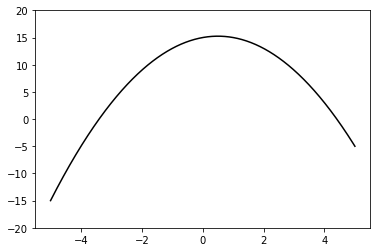

In [5]:
draw_polynomial(coefs)

##Dataset

We start with dataset that is a parabola that opens downward (a sad face).Therefore, it is not a problem we can solve with linear regression—we must use polynomial regression.

In [9]:
X, Y = [], []

for i in range(40):
  x = random.uniform(-5, 5)
  y = polynomial(coefs, x) + random.gauss(0, 2)
  X.append(x)
  Y.append(y)

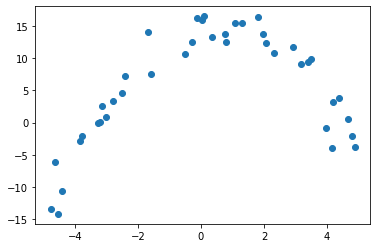

In [10]:
plt.scatter(X, Y)

In [16]:
data = tc.SFrame({"x": X, "y": Y})
data.print_rows(5, 2)

+----------------------+---------------------+
|          x           |          y          |
+----------------------+---------------------+
|  2.0528339985440622  |  12.252654244338753 |
|  3.4948596518636705  |  9.887928796750838  |
|  3.950389674266752   | -0.7886240883010993 |
|  0.796950107456059   |  12.545900209788488 |
| -0.49436893368844803 |  10.687314649720424 |
+----------------------+---------------------+
[40 rows x 2 columns]



The way to do polynomial regression in Turi Create is to add many columns to our dataset, corresponding
to the powers of the main feature, and to apply linear regression to this expanded
dataset. 

If the main feature is, say, $x$, then we add columns with the values of $x^2, x^3, x^4$, and so on.
Thus, our model is finding linear combinations of the powers of $x$, which are precisely polynomials
in $x$.

So, let's add columns to our dataset corresponding to $X^2, X^3,...,x^{200}$.

In [ ]:
for i in range(2, 200):
  strings = "x^" + str(i)
  data[strings] = data["x"].apply(lambda x: x ** i)

In [18]:
data.print_rows(5, 5)

+----------------------+---------------------+---------------------+
|          x           |          y          |         x^2         |
+----------------------+---------------------+---------------------+
|  2.0528339985440622  |  12.252654244338753 |  4.214127425578403  |
|  3.4948596518636705  |  9.887928796750838  |  12.214043986224656 |
|  3.950389674266752   | -0.7886240883010993 |  15.605578578553375 |
|  0.796950107456059   |  12.545900209788488 |  0.635129473774224  |
| -0.49436893368844803 |  10.687314649720424 | 0.24440064259625313 |
+----------------------+---------------------+---------------------+
+----------------------+----------------------+-----+
|         x^3          |         x^4          | ... |
+----------------------+----------------------+-----+
|  8.650904053424307   |  17.758869959012056  | ... |
|  42.68636951354466   |  149.18287049743068  | ... |
|  61.64811647767568   |   243.534082771404   | ... |
|  0.506166502372878   | 0.40338944845672264  | ... |
|

Before we train any models, we need to split the data into training and testing datasets.

In [19]:
train, test = data.random_split(.8)

##Regularization